# Human Activity Recognition Using Smartphone

### Downloading the Dataset from the Provided Link

https://www.utwente.nl/en/eemcs/ps/dataset-folder/sensors-activity-recognition-dataset-shoaib.rar


Introduction
In this notebook, we will be exploring the data collected from experiments for human activity recognition. Before we dive into the data, let's understand the background and the context in which this data was collected.

Background
Correction: Please note that in section 3 (data collection) in our associated paper, the term "running" was mistakenly used instead of "jogging." Hence, in this analysis, we will only consider the "jogging" activity.

Data Collection
Overview:
Activities: Seven physical activities were selected for this experiment, including:
Walking
Sitting
Standing
Jogging
Biking
Walking Upstairs
Walking Downstairs
These activities were chosen based on their common occurrence in daily life and their frequent usage in related studies.

Participants: Ten male participants between the ages of 25-30 were involved. Each participant performed each activity for 3-4 minutes.

Environment:
Location: All activities were performed indoors within a university setting, except for biking.
For walking and jogging, a department corridor was utilized.
A 5-floor building was used for walking upstairs and walking downstairs activities.

Equipment:
Participants were equipped with five Samsung Galaxy SII (i9100) smartphones placed in specific body positions:

1.Right jean's pocket
2.Left jean's pocket
3.Belt position towards the right leg (with a belt clipper)
4.Right upper arm
5.Right wrist (simulating a smart-watch)
The choice of these positions was based on common ways people carry smartphones. The orientation of the smartphones varied based on the position:

Portrait: upper arm, wrist, and pockets.
Landscape: belt position.

Data Sampling:
Rate: Data was sampled at 50 samples/second. This rate is considered sufficient for recognizing human physical activities based on our prior research and other state-of-the-art findings.

Sensors: Data was collected from multiple sensors, including:
Accelerometer
Linear Acceleration Sensor
Gyroscope
Magnetometer
The data collection was facilitated using a custom-built app, adapted from our previous studies, with an added linear acceleration sensor.

## Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Ignoring invalid distribution")

In [2]:
!pip install --upgrade setuptools pip

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/bb/26/7945080113158354380a12ce26873dd6c1ebd88d47f5bc24e2c5bb38c16a/setuptools-68.2.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/807.9 kB ? eta -:--:--
   - ------------------------------------- 30.7/807.9 kB 640.0 kB/s eta 0:00:02
   - ------------------------------------- 30.7/807.9 kB 640.0 kB/s eta 0:00:02
   ----------------- ---------------------- 358.4/807.9 kB 2.8 MB/s eta 0:00:01
   ----------------------- ---------------- 471.0/807.9 kB 3.3 MB/s eta 0:00:01
   ------------------------------ --------- 614.4/807.9 kB 3.0 MB/s eta 0:00:01
   ------------------------------------- -- 747.5/807.9 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 807.9/807.9 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 68.1.2
    Uninstalling setuptools-68.1.2:
      Successfully uninstalled setuptools

In [3]:
!pip install seaborn

In [4]:
!pip install keras
!pip install numpy
!pip install matplotlib
!pip3 install pyunpack
!pip3 install patool
!pip install pytz
!pip install pandas


In [5]:
!pip install scikit-learn


In [6]:
!pip install tensorflow

In [1]:
import urllib.request

# Define a function to track the download progress
def download_progress(block_num, block_size, total_size):
    downloaded = block_num * block_size
    percent = min(100.0, downloaded / total_size * 100)  # Calculate download percentage
    progress = f"\rProgress: {downloaded}/{total_size} bytes ({percent:.2f}%)"  # Create progress message
    print(progress, end='', flush=True)  # Print progress without newline and flush the output

print('Downloading dataset')

# URL of the dataset to download
url = 'https://www.utwente.nl/en/eemcs/ps/dataset-folder/sensors-activity-recognition-dataset-shoaib.rar'

# Specify the path where the downloaded file should be saved
save_path = 'HAR_dataset.rar'  # Specify your desired save location here

try:
    # Use urllib to retrieve the file and call the download_progress function to show progress
    urllib.request.urlretrieve(url, save_path, reporthook=download_progress)
    print('\nDownload completed')  # Print a message after the download is completed
except urllib.error.URLError as e:
    print('\nError during download:', e.reason)  # Print an error message if the download fails
except Exception as e:
    print('\nAn error occurred:', str(e))  # Print a general error message for other exceptions


Progress: 24584192/100080442 bytes (24.56%)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: 55894016/100080442 bytes (55.85%)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: 100081664/100080442 bytes (100.00%)
Download completed


###  Extract in the working directory


In [8]:
from pyunpack import Archive
Archive('HAR_dataset.rar').extractall('.')

## Exploratory Data Analysis (EDA)


In [9]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [10]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [11]:
path = 'DataSet/'

files=[file for file in os.listdir(path) if file.endswith('.csv')]
files

['Participant_1.csv',
 'Participant_10.csv',
 'Participant_2.csv',
 'Participant_3.csv',
 'Participant_4.csv',
 'Participant_5.csv',
 'Participant_6.csv',
 'Participant_7.csv',
 'Participant_8.csv',
 'Participant_9.csv']

In [12]:
# load a file into memory
df=pd.read_csv(path+files[0],header=1)
df.head()

time_stamp       Ax      Ay       Az       Lx      Ly       Lz       Gx  \
0  1.390000e+12 -1.81150 -14.873 -1.34840 -1.26910 -5.1057 -0.66445 -0.53206   
1  1.390000e+12  0.24517 -14.070 -0.84446  0.70147 -4.2969 -0.17199 -0.25229   
2  1.390000e+12 -0.57205 -14.628 -1.75700 -0.21760 -4.8531 -1.05650 -1.04920   
3  1.390000e+12 -0.69464 -12.939 -3.09180 -0.32273 -3.1786 -2.21970 -2.37200   
4  1.390000e+12  0.87170 -12.000 -1.56630  1.13740 -2.2390 -0.65476 -2.79010   

        Gy       Gz  ...    Lx.4     Ly.4      Lz.4     Gx.4     Gy.4  \
0 -3.18690  0.23976  ... -5.3574 -0.95749  0.318860  0.52565 -0.18815   
1 -1.79660  0.40745  ... -4.5352 -0.67629  0.081656  0.43616  0.16371   
2  0.29138  0.29230  ... -4.0408 -0.55974 -0.523690  0.32284  0.43127   
3  1.00820  0.34972  ... -3.5908  0.15795 -1.880200  0.20403  0.72846   
4  0.65485  0.22724  ... -1.9450  0.85796 -2.995300  0.09896  0.94379   

       Gz.4   Mx.4  My.4  Mz.4  Unnamed: 69  
0  0.285880 -22.20  6.48  4.56      walking  
1  0.198230 -21.90  7.14  5.34      walking  
2  0.211970 -21.60  7.50  5.64      walking  
3  0.164930 -21.12  8.40  6.12      walking  
4  0.064752 -20.94  8.70  6.30      walking  

[5 rows x 70 columns]

In [13]:
df.rename(columns={'Unnamed: 69': 'Activity'}, inplace=True)


In [14]:
#Display basic information about the DataFrame

In [15]:
df.tail()

time_stamp        Ax      Ay        Az       Lx      Ly        Lz  \
62995  1.390000e+12  0.054481 -7.8589 -2.982900 -1.57750  1.7975 -3.492600   
62996  1.390000e+12  0.844460 -7.5593 -2.329100 -0.79722  2.1015 -2.708100   
62997  1.390000e+12  0.354130 -6.5786 -0.095342 -1.29470  3.0850 -0.350820   
62998  1.390000e+12  0.122580 -6.4833  0.245170 -1.52370  3.1816  0.021841   
62999  1.390000e+12 -0.640160 -7.1643 -1.103200 -2.45230  2.5070 -1.189900   

            Gx       Gy        Gz  ...    Lx.4    Ly.4     Lz.4      Gx.4  \
62995 -0.27550 -1.69030  0.032376  ...  1.0482 -2.1890  1.18720  0.695780   
62996 -0.39248 -0.97952 -0.003054  ...  3.8146 -1.4254  1.15950  0.220520   
62997 -0.22205 -0.71899 -0.001222  ...  5.9806 -1.7319  0.51091  0.447760   
62998 -0.24129 -1.13040 -0.000611  ...  7.2888 -3.6499 -1.26090  0.001527   
62999 -0.38179 -0.95478  0.077885  ...  6.9484 -4.7499 -1.81110 -0.078802   

           Gy.4      Gz.4   Mx.4   My.4  Mz.4    Activity  
62995 -0.087048 -0.239760  33.54 -23.10 -5.40  downstairs  
62996  0.383930 -0.315510  33.36 -22.98 -5.22  downstairs  
62997  0.536950 -0.069944  33.54 -22.80 -5.22  downstairs  
62998 -0.030849  0.135000  33.42 -22.50 -5.04  downstairs  
62999 -0.328030  0.149050  33.48 -22.50 -4.98  downstairs  

[5 rows x 70 columns]

The dataset contains time-series data of human activities collected from sensors.

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63000 entries, 0 to 62999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time_stamp    63000 non-null  float64
 1   Ax            63000 non-null  float64
 2   Ay            63000 non-null  float64
 3   Az            63000 non-null  float64
 4   Lx            63000 non-null  float64
 5   Ly            63000 non-null  float64
 6   Lz            63000 non-null  float64
 7   Gx            63000 non-null  float64
 8   Gy            63000 non-null  float64
 9   Gz            63000 non-null  float64
 10  Mx            63000 non-null  float64
 11  My            63000 non-null  float64
 12  Mz            63000 non-null  float64
 13  Unnamed: 13   0 non-null      float64
 14  time_stamp.1  63000 non-null  float64
 15  Ax.1          63000 non-null  float64
 16  Ay.1          63000 non-null  float64
 17  Az.1          63000 non-null  float64
 18  Lx.1          63000 non-nu

In [17]:
df.duplicated().any()

False

No duplicated data entries are present

In [18]:
df.isnull().sum()

time_stamp    0
Ax            0
Ay            0
Az            0
Lx            0
             ..
Gz.4          0
Mx.4          0
My.4          0
Mz.4          0
Activity      0
Length: 70, dtype: int64

### Activtiy Distribution

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

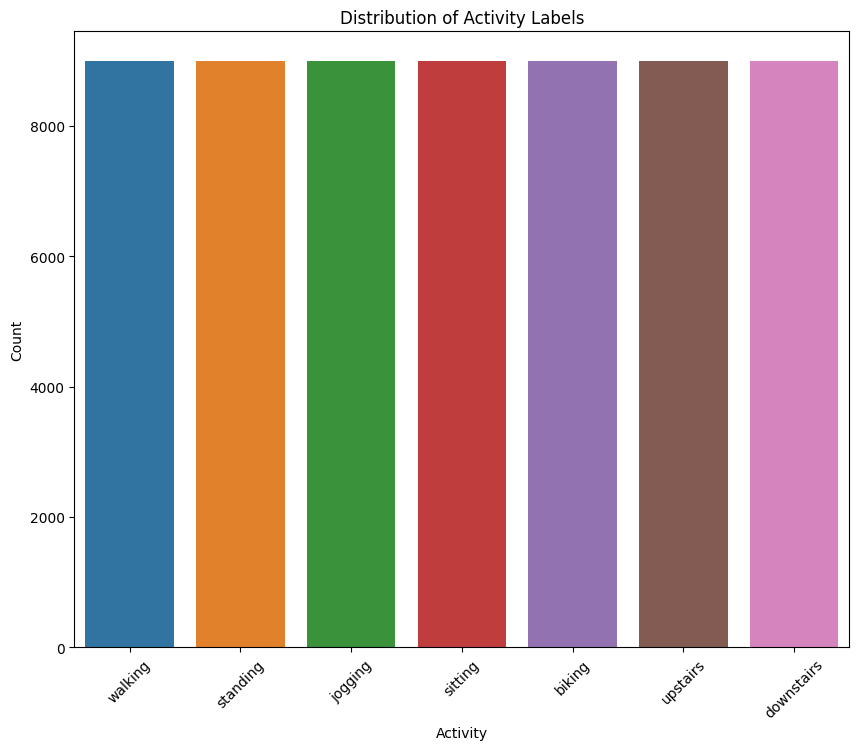

In [20]:
plt.figure(figsize=(10, 8))
plt.title('Distribution of Activity Labels')
plt.ylabel('Count')
plt.xlabel('Activity')
count_series = df['Activity'].value_counts()
sns.barplot(x=count_series.index, y=count_series.values)
plt.xticks(rotation=45)
plt.show()


Hence our dataset is a balanced dataset.

### Unique Activities

In [21]:
df['Activity'].unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

## Exploring Activity-Related Variations in Sensor Readings

In this section, we aim to understand the variations in the tri-axial accelerometer readings across different human activities. We focus on four distinct activities: Walking, Standing, Biking, and Jogging.

### Walking

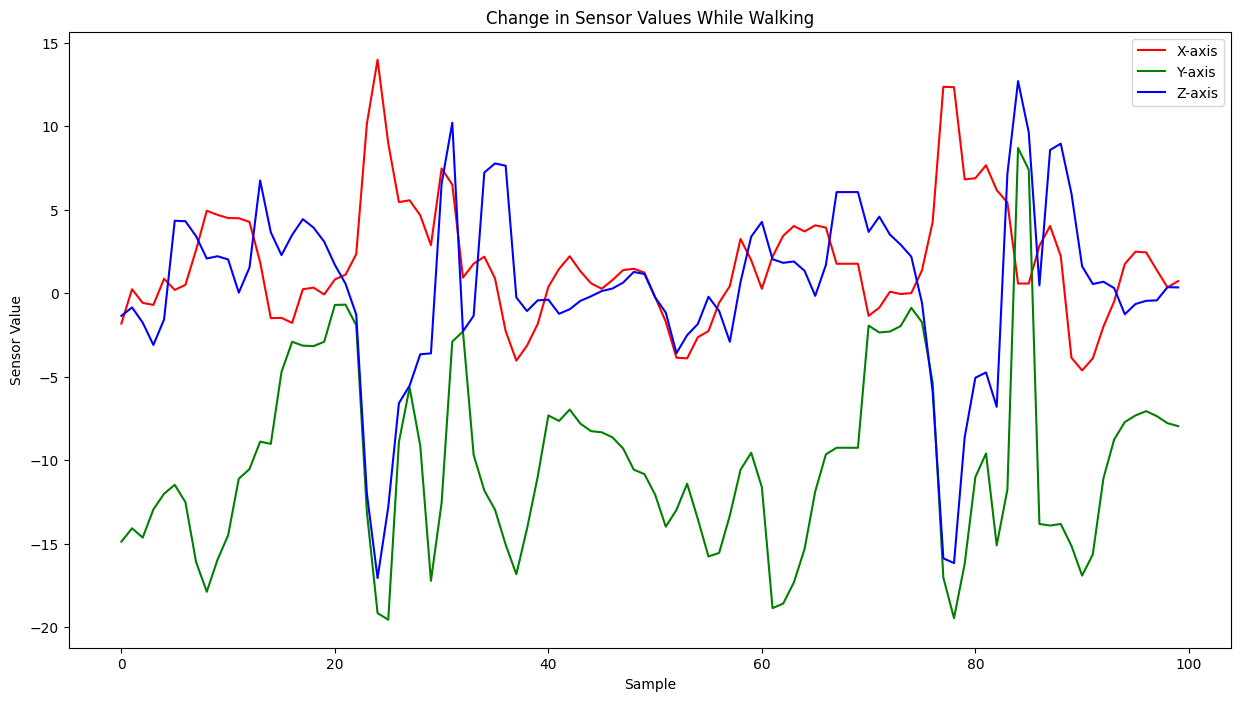

In [22]:

# Select the first 100 rows of data for the 'walking' activity
walking_data = df[df['Activity'] == "walking"].iloc[:100]

# Create a new figure for the plot
plt.figure(figsize=(15, 8))

# Plot the X-axis sensor values with red color
plt.plot(np.arange(0, 100), walking_data['Ax'], label='X-axis', color='red')

# Plot the Y-axis sensor values with green color
plt.plot(np.arange(0, 100), walking_data['Ay'], label='Y-axis', color='green')

# Plot the Z-axis sensor values with blue color
plt.plot(np.arange(0, 100), walking_data['Az'], label='Z-axis', color='blue')

# Set the plot title
plt.title('Change in Sensor Values While Walking')

# Label the x-axis
plt.xlabel('Sample')

# Label the y-axis
plt.ylabel('Sensor Value')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()




 Accelerometer readings during walking indicate rhythmic patterns, consistent with the stepping motion.

### Standing

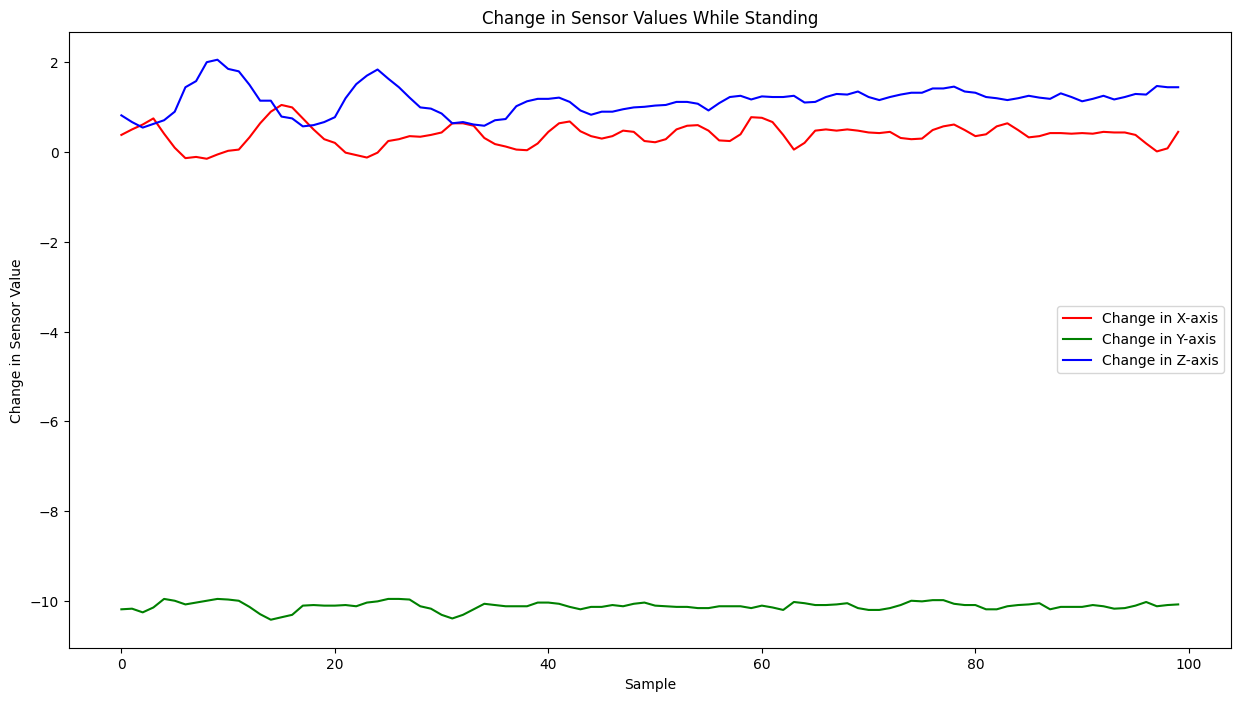

In [23]:
# Select the first 100 rows of data for the 'standing' activity
standing_data = df[df['Activity'] == "standing"].iloc[:100]

# Create a new figure for the plot
plt.figure(figsize=(15, 8))

# Plot the change in X-axis sensor values while standing
plt.plot(np.arange(0, 100), standing_data['Ax'], label='Change in X-axis', color='red')

# Plot the change in Y-axis sensor values while standing
plt.plot(np.arange(0, 100), standing_data['Ay'], label='Change in Y-axis', color='green')

# Plot the change in Z-axis sensor values while standing
plt.plot(np.arange(0, 100), standing_data['Az'], label='Change in Z-axis', color='blue')

# Set the plot title
plt.title('Change in Sensor Values While Standing')

# Label the x-axis
plt.xlabel('Sample')

# Label the y-axis
plt.ylabel('Change in Sensor Value')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


As expected, accelerometer readings are relatively stable with minor fluctuations.

### Biking

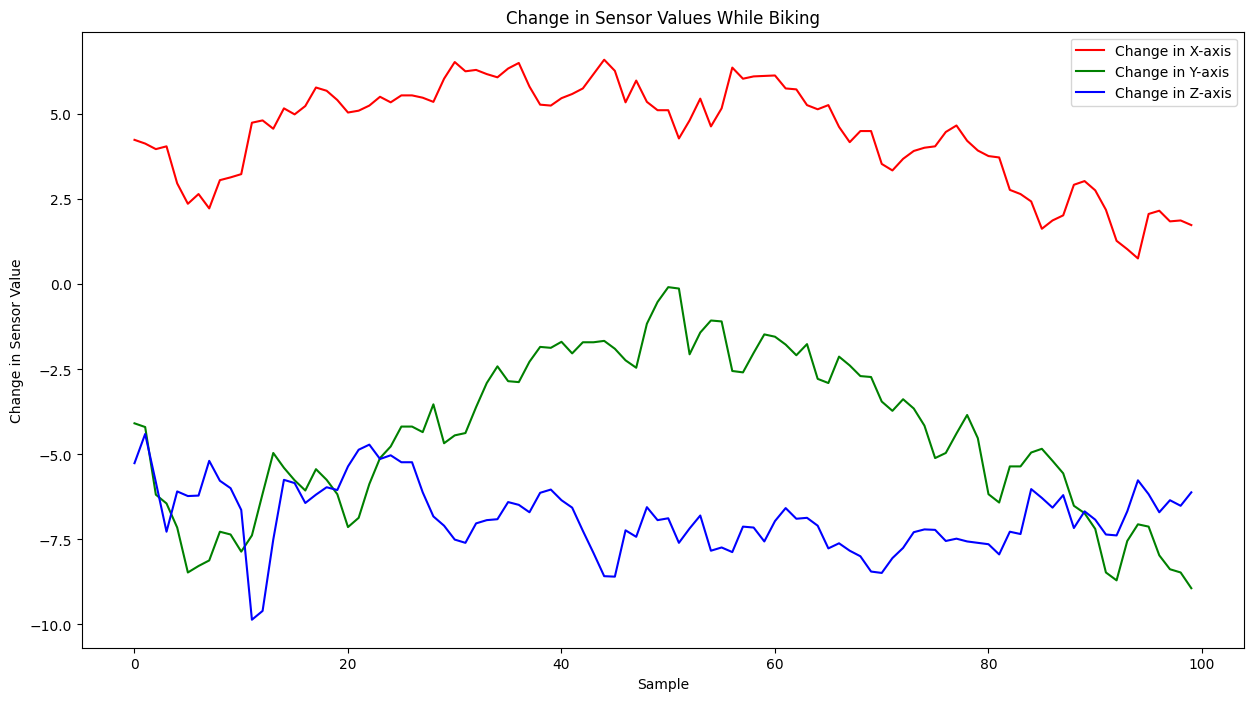

In [24]:
# Select the first 100 rows of data for the 'biking' activity
biking_data = df[df['Activity'] == "biking"].iloc[:100]

# Create a new figure for the plot
plt.figure(figsize=(15, 8))

# Plot the change in X-axis sensor values while biking
plt.plot(np.arange(0, 100), biking_data['Ax'], label='Change in X-axis', color='red')

# Plot the change in Y-axis sensor values while biking
plt.plot(np.arange(0, 100), biking_data['Ay'], label='Change in Y-axis', color='green')

# Plot the change in Z-axis sensor values while biking
plt.plot(np.arange(0, 100), biking_data['Az'], label='Change in Z-axis', color='blue')

# Set the plot title
plt.title('Change in Sensor Values While Biking')

# Label the x-axis
plt.xlabel('Sample')

# Label the y-axis
plt.ylabel('Change in Sensor Value')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


The accelerometer captures the pedaling motion with notable variations, especially in the Z-axis.

### Jogging

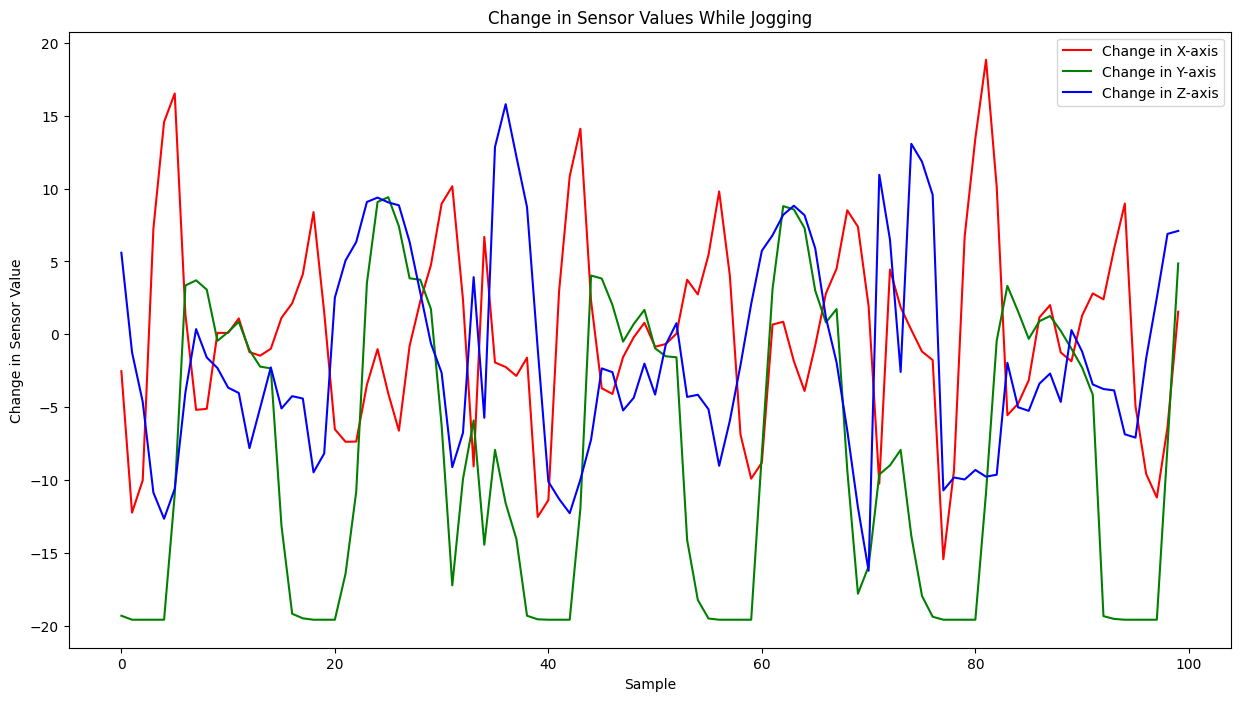

In [25]:
# Select the first 100 rows of data for the 'jogging' activity
jogging_data = df[df['Activity'] == "jogging"].iloc[:100]

# Create a new figure for the plot
plt.figure(figsize=(15, 8))

# Plot the change in X-axis sensor values while jogging with red color
plt.plot(np.arange(0, 100), jogging_data['Ax'], color='red', label='Change in X-axis')

# Plot the change in Y-axis sensor values while jogging with green color
plt.plot(np.arange(0, 100), jogging_data['Ay'], color='green', label='Change in Y-axis')

# Plot the change in Z-axis sensor values while jogging with blue color
plt.plot(np.arange(0, 100), jogging_data['Az'], color='blue', label='Change in Z-axis')

# Set the plot title
plt.title('Change in Sensor Values While Jogging')

# Label the x-axis
plt.xlabel('Sample')

# Label the y-axis
plt.ylabel('Change in Sensor Value')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

Similar to walking, but with pronounced fluctuations capturing the running motion's intensity.

## Combining Data from Multiple Files: Creating a Unified DataFrame

In [26]:
df=pd.DataFrame()
# Create an empty DataFrame named 'df' to store the concatenated data.

for file in files:
 # Iterate through each 'file' in the 'files' list (assuming 'files' is defined elsewhere).
    
    df_temp=pd.read_csv(path+file,header=1)
    # 'header=1' indicates that the second row of the CSV file (0-indexed) contains column headers.
    df=pd.concat([df,df_temp], sort=False)
df
# Display the final concatenated DataFrame 'df' containing data from all the CSV files.

time_stamp       Ax       Ay       Az        Lx        Ly        Lz  \
0      1.390000e+12 -1.81150 -14.8730 -1.34840 -1.269100 -5.105700 -0.664450   
1      1.390000e+12  0.24517 -14.0700 -0.84446  0.701470 -4.296900 -0.171990   
2      1.390000e+12 -0.57205 -14.6280 -1.75700 -0.217600 -4.853100 -1.056500   
3      1.390000e+12 -0.69464 -12.9390 -3.09180 -0.322730 -3.178600 -2.219700   
4      1.390000e+12  0.87170 -12.0000 -1.56630  1.137400 -2.239000 -0.654760   
...             ...      ...      ...      ...       ...       ...       ...   
62995  1.390000e+12 -3.11910  -9.0167 -1.51190  2.289100 -0.836530 -1.422500   
62996  1.390000e+12 -4.56280  -7.5321  0.70826  0.843960  0.648940  0.615980   
62997  1.390000e+12 -5.40730  -7.8045  0.87170 -0.022973  0.389340  0.668480   
62998  1.390000e+12 -6.04740  -8.1177  0.25879 -0.695410  0.094103 -0.044593   
62999  1.390000e+12 -6.12920  -8.3493 -1.26670 -0.798490 -0.127550 -1.663900   

             Gx       Gy        Gz  ...     Lx.4     Ly.4      Lz.4     Gx.4  \
0     -0.532060 -3.18690  0.239760  ... -5.35740 -0.95749  0.318860  0.52565   
1     -0.252290 -1.79660  0.407450  ... -4.53520 -0.67629  0.081656  0.43616   
2     -1.049200  0.29138  0.292300  ... -4.04080 -0.55974 -0.523690  0.32284   
3     -2.372000  1.00820  0.349720  ... -3.59080  0.15795 -1.880200  0.20403   
4     -2.790100  0.65485  0.227240  ... -1.94500  0.85796 -2.995300  0.09896   
...         ...      ...       ...  ...      ...      ...       ...      ...   
62995  0.430050 -0.50946  0.111790  ...  0.54756  2.91870 -1.543100 -0.74678   
62996  0.197920 -0.67959 -0.092546  ...  0.65620  2.68710 -1.546200 -0.35308   
62997  0.193340 -0.65088 -0.208000  ...  1.54690  1.68460 -1.771800 -0.28711   
62998  0.188760 -0.50824 -0.164630  ...  1.14830  0.69598 -1.924200 -0.32742   
62999  0.081856 -0.45662 -0.041539  ...  0.39406  0.55024 -2.233000 -0.36469   

          Gy.4      Gz.4   Mx.4   My.4   Mz.4  Unnamed: 69  
0     -0.18815  0.285880 -22.20   6.48   4.56      walking  
1      0.16371  0.198230 -21.90   7.14   5.34      walking  
2      0.43127  0.211970 -21.60   7.50   5.64      walking  
3      0.72846  0.164930 -21.12   8.40   6.12      walking  
4      0.94379  0.064752 -20.94   8.70   6.30      walking  
...        ...       ...    ...    ...    ...          ...  
62995  0.31857  0.103540  27.06  27.30 -76.92   downstairs  
62996  0.35125  0.221440  26.94  27.30 -76.80   downstairs  
62997  0.19487  0.210750  26.58  27.12 -77.04   downstairs  
62998 -0.16066  0.114230  26.46  27.18 -76.92   downstairs  
62999 -0.29230  0.063225  26.28  27.06 -76.80   downstairs  

[630000 rows x 70 columns]

In [27]:
# Iterate through columns and print each column name
for column_name in df.columns:
    print(column_name)

time_stamp
Ax
Ay
Az
Lx
Ly
Lz
Gx
Gy
Gz
Mx
My
Mz
Unnamed: 13
time_stamp.1
Ax.1
Ay.1
Az.1
Lx.1
Ly.1
Lz.1
Gx.1
Gy.1
Gz.1
Mx.1
My.1
Mz.1
Unnamed: 27
time_stamp.2
Ax.2
Ay.2
Az.2
Lx.2
Ly.2
Lz.2
Gx.2
Gy.2
Gz.2
Mx.2
My.2
Mz.2
Unnamed: 41
time_stamp.3
Ax.3
Ay.3
Az.3
Lx.3
Ly.3
Lz.3
Gx.3
Gy.3
Gz.3
Mx.3
My.3
Mz.3
Unnamed: 55
time_stamp.4
Ax.4
Ay.4
Az.4
Lx.4
Ly.4
Lz.4
Gx.4
Gy.4
Gz.4
Mx.4
My.4
Mz.4
Unnamed: 69


### Extracting Sensor Data:

In [28]:
# Define column indices for left pocket sensor data
left_pocket_sensor_indices = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Extract left pocket sensor data based on column indices
left_pocket = df.iloc[:, left_pocket_sensor_indices]

# Display the left pocket sensor data
left_pocket


Ax       Ay       Az        Lx        Ly        Lz        Gx  \
0     -1.81150 -14.8730 -1.34840 -1.269100 -5.105700 -0.664450 -0.532060   
1      0.24517 -14.0700 -0.84446  0.701470 -4.296900 -0.171990 -0.252290   
2     -0.57205 -14.6280 -1.75700 -0.217600 -4.853100 -1.056500 -1.049200   
3     -0.69464 -12.9390 -3.09180 -0.322730 -3.178600 -2.219700 -2.372000   
4      0.87170 -12.0000 -1.56630  1.137400 -2.239000 -0.654760 -2.790100   
...        ...      ...      ...       ...       ...       ...       ...   
62995 -3.11910  -9.0167 -1.51190  2.289100 -0.836530 -1.422500  0.430050   
62996 -4.56280  -7.5321  0.70826  0.843960  0.648940  0.615980  0.197920   
62997 -5.40730  -7.8045  0.87170 -0.022973  0.389340  0.668480  0.193340   
62998 -6.04740  -8.1177  0.25879 -0.695410  0.094103 -0.044593  0.188760   
62999 -6.12920  -8.3493 -1.26670 -0.798490 -0.127550 -1.663900  0.081856   

            Gy        Gz  
0     -3.18690  0.239760  
1     -1.79660  0.407450  
2      0.29138  0.292300  
3      1.00820  0.349720  
4      0.65485  0.227240  
...        ...       ...  
62995 -0.50946  0.111790  
62996 -0.67959 -0.092546  
62997 -0.65088 -0.208000  
62998 -0.50824 -0.164630  
62999 -0.45662 -0.041539  

[630000 rows x 9 columns]

In [29]:
right_pocket = df[df.columns[15:24]]
right_pocket.columns=left_pocket.columns
right_pocket

Ax       Ay        Az       Lx       Ly       Lz       Gx  \
0     -1.19860 -13.8520  3.786500 -1.76980 -4.06250  3.89850 -3.62550   
1     -2.38360 -16.5900  2.996500 -2.70250 -6.78900  2.86820 -3.48990   
2     -4.63090 -16.6030  2.070300 -4.34550 -6.80810  1.68890 -3.38510   
3     -4.78070 -16.4530  1.157700 -4.19540 -6.67310  0.74084 -3.10170   
4     -0.92618 -12.1900 -1.062400 -0.18116 -2.41440 -1.28500 -2.75870   
...        ...      ...       ...      ...      ...      ...      ...   
62995  3.86820  -9.9020  0.354130  3.55870 -0.18493 -0.93169 -0.20617   
62996  3.94990  -9.5206  0.054481  3.63060  0.20627 -1.15210 -0.25137   
62997  3.43230  -9.4798 -0.313270  3.09120  0.24997 -1.49070 -0.13531   
62998  2.43800  -9.5615 -0.858080  2.04180  0.17223 -1.98430 -0.16768   
62999  2.77860 -10.0380  0.490330  2.28560 -0.29845 -0.54154 -0.43768   

            Gy        Gz  
0      1.07390  0.136220  
1      0.39034  0.400730  
2     -1.99200  1.122800  
3     -3.04390  0.791380  
4     -4.46020  0.693640  
...        ...       ...  
62995  0.28253  0.230910  
62996  0.32223  0.107210  
62997  0.25351 -0.073609  
62998  0.29963 -0.204330  
62999  0.27764 -0.260530  

[630000 rows x 9 columns]

In [30]:
# Concatenate left and right pocket data into one DataFrame
train_df = pd.concat([left_pocket, right_pocket], sort=False)

# Display the concatenated DataFrame
train_df

Ax       Ay        Az       Lx       Ly       Lz       Gx  \
0     -1.81150 -14.8730 -1.348400 -1.26910 -5.10570 -0.66445 -0.53206   
1      0.24517 -14.0700 -0.844460  0.70147 -4.29690 -0.17199 -0.25229   
2     -0.57205 -14.6280 -1.757000 -0.21760 -4.85310 -1.05650 -1.04920   
3     -0.69464 -12.9390 -3.091800 -0.32273 -3.17860 -2.21970 -2.37200   
4      0.87170 -12.0000 -1.566300  1.13740 -2.23900 -0.65476 -2.79010   
...        ...      ...       ...      ...      ...      ...      ...   
62995  3.86820  -9.9020  0.354130  3.55870 -0.18493 -0.93169 -0.20617   
62996  3.94990  -9.5206  0.054481  3.63060  0.20627 -1.15210 -0.25137   
62997  3.43230  -9.4798 -0.313270  3.09120  0.24997 -1.49070 -0.13531   
62998  2.43800  -9.5615 -0.858080  2.04180  0.17223 -1.98430 -0.16768   
62999  2.77860 -10.0380  0.490330  2.28560 -0.29845 -0.54154 -0.43768   

            Gy        Gz  
0     -3.18690  0.239760  
1     -1.79660  0.407450  
2      0.29138  0.292300  
3      1.00820  0.349720  
4      0.65485  0.227240  
...        ...       ...  
62995  0.28253  0.230910  
62996  0.32223  0.107210  
62997  0.25351 -0.073609  
62998  0.29963 -0.204330  
62999  0.27764 -0.260530  

[1260000 rows x 9 columns]

In [31]:
# restore labels in dataframe
labels=pd.concat([df['Unnamed: 69'],df['Unnamed: 69']],axis=0, sort=False)
labels.columns=['Activity']
train_df['Activity']=labels
train_df

Ax       Ay        Az       Lx       Ly       Lz       Gx  \
0     -1.81150 -14.8730 -1.348400 -1.26910 -5.10570 -0.66445 -0.53206   
1      0.24517 -14.0700 -0.844460  0.70147 -4.29690 -0.17199 -0.25229   
2     -0.57205 -14.6280 -1.757000 -0.21760 -4.85310 -1.05650 -1.04920   
3     -0.69464 -12.9390 -3.091800 -0.32273 -3.17860 -2.21970 -2.37200   
4      0.87170 -12.0000 -1.566300  1.13740 -2.23900 -0.65476 -2.79010   
...        ...      ...       ...      ...      ...      ...      ...   
62995  3.86820  -9.9020  0.354130  3.55870 -0.18493 -0.93169 -0.20617   
62996  3.94990  -9.5206  0.054481  3.63060  0.20627 -1.15210 -0.25137   
62997  3.43230  -9.4798 -0.313270  3.09120  0.24997 -1.49070 -0.13531   
62998  2.43800  -9.5615 -0.858080  2.04180  0.17223 -1.98430 -0.16768   
62999  2.77860 -10.0380  0.490330  2.28560 -0.29845 -0.54154 -0.43768   

            Gy        Gz    Activity  
0     -3.18690  0.239760     walking  
1     -1.79660  0.407450     walking  
2      0.29138  0.292300     walking  
3      1.00820  0.349720     walking  
4      0.65485  0.227240     walking  
...        ...       ...         ...  
62995  0.28253  0.230910  downstairs  
62996  0.32223  0.107210  downstairs  
62997  0.25351 -0.073609  downstairs  
62998  0.29963 -0.204330  downstairs  
62999  0.27764 -0.260530  downstairs  

[1260000 rows x 10 columns]

In [32]:
#check for unique labels
train_df.Activity.unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs', 'upsatirs'], dtype=object)

In [33]:
train_df.Activity.loc[(train_df.Activity == 'upsatirs')] = 'upstairs'
# In the 'train_df' DataFrame, locate rows where the 'Activity' column value is 'upsatirs'.
# Then, replace these occurrences with the correct value 'upstairs'.
# This corrects the typo in the activity name.

C:\Users\haari\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [34]:
# Display the unique values in the 'Activity' column of the 'train_df' DataFrame.
train_df.Activity.unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

### Data and Label Segmentation for Preprocessing

In [35]:
X_train = train_df[train_df.columns[:9]]
# Create a new DataFrame 'X_train' containing the columns of 'train_df' from index 0 to 8 (columns 0 to 8).
# This DataFrame represents the features or input variables used for training.

y_train = train_df[train_df.columns[9:10]]
# Create a new DataFrame 'y_train' containing the column of 'train_df' at index 9 (column 9).
# This DataFrame represents the target variable or the expected outputs for training.


In [36]:
X_train 

Ax       Ay        Az       Lx       Ly       Lz       Gx  \
0     -1.81150 -14.8730 -1.348400 -1.26910 -5.10570 -0.66445 -0.53206   
1      0.24517 -14.0700 -0.844460  0.70147 -4.29690 -0.17199 -0.25229   
2     -0.57205 -14.6280 -1.757000 -0.21760 -4.85310 -1.05650 -1.04920   
3     -0.69464 -12.9390 -3.091800 -0.32273 -3.17860 -2.21970 -2.37200   
4      0.87170 -12.0000 -1.566300  1.13740 -2.23900 -0.65476 -2.79010   
...        ...      ...       ...      ...      ...      ...      ...   
62995  3.86820  -9.9020  0.354130  3.55870 -0.18493 -0.93169 -0.20617   
62996  3.94990  -9.5206  0.054481  3.63060  0.20627 -1.15210 -0.25137   
62997  3.43230  -9.4798 -0.313270  3.09120  0.24997 -1.49070 -0.13531   
62998  2.43800  -9.5615 -0.858080  2.04180  0.17223 -1.98430 -0.16768   
62999  2.77860 -10.0380  0.490330  2.28560 -0.29845 -0.54154 -0.43768   

            Gy        Gz  
0     -3.18690  0.239760  
1     -1.79660  0.407450  
2      0.29138  0.292300  
3      1.00820  0.349720  
4      0.65485  0.227240  
...        ...       ...  
62995  0.28253  0.230910  
62996  0.32223  0.107210  
62997  0.25351 -0.073609  
62998  0.29963 -0.204330  
62999  0.27764 -0.260530  

[1260000 rows x 9 columns]

In [37]:
y_train

Activity
0         walking
1         walking
2         walking
3         walking
4         walking
...           ...
62995  downstairs
62996  downstairs
62997  downstairs
62998  downstairs
62999  downstairs

[1260000 rows x 1 columns]

In [38]:
y_train.Activity.unique()
# Retrieve the unique values from the 'Activity' column of the DataFrame 'y_train'.
# This is useful to see the distinct categories or classes present in the target variable.


array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

## Encode labels into number

In [39]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Use the LabelEncoder to fit and transform the 'Activity' column of y_train
y_train = encoder.fit_transform(y_train)

# Display the first 10 encoded values
print(y_train[:10])


[6 6 6 6 6 6 6 6 6 6]


C:\Users\haari\anaconda3\envs\python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Split training data into training and validation data

In [40]:
def train_test_split(X, y, split_size=0.8):
    # Calculating the index at which to split the data based on the split_size
    split = int(len(X) * split_size)
    
    # Split the input features (X) and target labels (y) into training and testing sets
    train_x = X[:split]  # Select data up to the split index for training
    train_y = y[:split]  # Corresponding labels for training data
    test_x = X[split:]   
    test_y = y[split:]   
    
    # Return the split datasets
    return train_x, test_x, train_y, test_y

# Apply the train_test_split function to X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1008000, 9)
y_train shape: (1008000,)
X_test shape: (252000, 9)
y_test shape: (252000,)


## Convert dataset into time series sequence

By using TimeseriesGenerator, we can efficiently create batches of time series sequences, which makes training on large datasets more manageable and allows the model to generalize better to acheive optimal model perfomance.

In [41]:
from keras.preprocessing.sequence import TimeseriesGenerator

# Define the number of time steps and number of features in each time step
n_time_steps = 100
n_features = 9
# Create a TimeseriesGenerator for training data
train_gen = TimeseriesGenerator(X_train.to_numpy(), y_train, length=n_time_steps, batch_size=1024)
# Create a TimeseriesGenerator for testing data
test_gen = TimeseriesGenerator(X_test.to_numpy(), y_test, length=n_time_steps, batch_size=1024)

# 1.Construct and compile 1D CNN model

In [42]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


In [43]:
# Convert these strings to integer labels first, and then one-hot encode them
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train.ravel())
y_test_encoded = encoder.transform(y_test.ravel())
num_classes = len(encoder.classes_)

In [44]:
# Enhancements for the CNN Model
model_enhanced = Sequential()
model_enhanced.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_time_steps, n_features)))
model_enhanced.add(MaxPooling1D(pool_size=2))
model_enhanced.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_enhanced.add(MaxPooling1D(pool_size=2))
model_enhanced.add(Flatten())
model_enhanced.add(Dense(100, activation='relu'))
model_enhanced.add(Dropout(0.5))
model_enhanced.add(Dense(50, activation='relu'))
model_enhanced.add(Dropout(0.5))
model_enhanced.add(Dense(num_classes, activation='softmax'))

In [45]:
model_enhanced.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [46]:
# Early stopping & learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_delta=0.0001)


In [47]:
history_enhanced = model_enhanced.fit(
    train_gen,
    epochs=5, 
    validation_data=test_gen,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/5
985/985 [==============================] - 86s 86ms/step - loss: 0.8538 - accuracy: 0.6758 - val_loss: 0.3235 - val_accuracy: 0.8161 - lr: 0.0010
Epoch 2/5
985/985 [==============================] - 82s 83ms/step - loss: 0.1879 - accuracy: 0.9548 - val_loss: 0.0693 - val_accuracy: 0.9841 - lr: 0.0010
Epoch 3/5
985/985 [==============================] - 82s 84ms/step - loss: 0.1955 - accuracy: 0.9613 - val_loss: 0.0686 - val_accuracy: 0.9829 - lr: 0.0010
Epoch 4/5
985/985 [==============================] - 82s 84ms/step - loss: 0.0914 - accuracy: 0.9825 - val_loss: 0.0524 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 5/5
985/985 [==============================] - 81s 82ms/step - loss: 0.0960 - accuracy: 0.9793 - val_loss: 0.0626 - val_accuracy: 0.9897 - lr: 0.0010


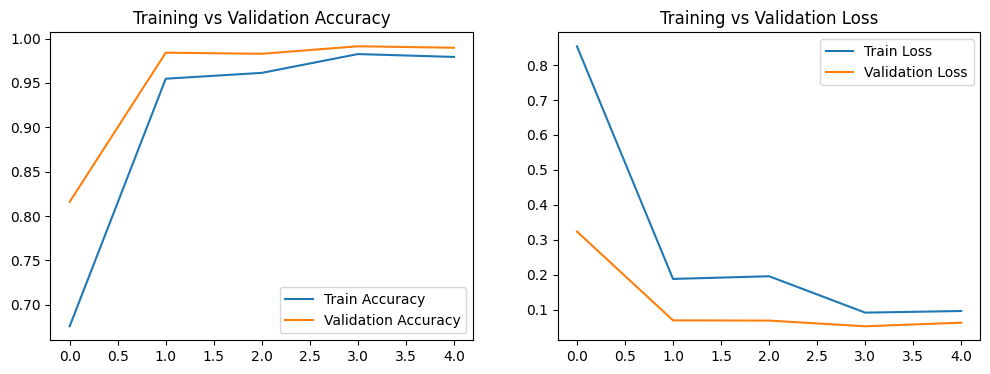

In [48]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_enhanced.history['accuracy'], label='Train Accuracy')
plt.plot(history_enhanced.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_enhanced.history['loss'], label='Train Loss')
plt.plot(history_enhanced.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()




# Confusion Matrix for CNN:


In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


246/246 [==============================] - 6s 24ms/step


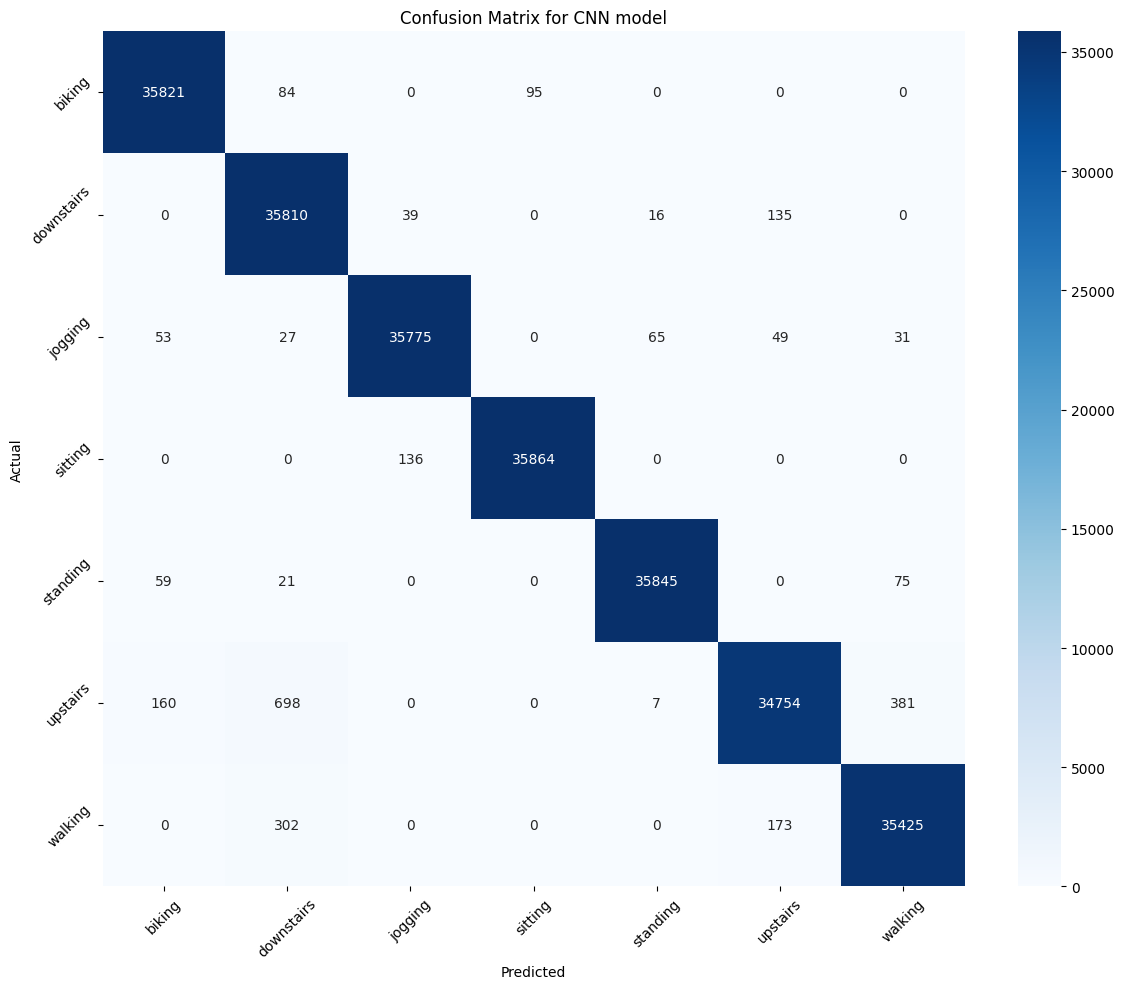

In [51]:

# 1. Predict using the trained CNN model
y_pred_probabilities = model_enhanced.predict(test_gen)

# 2. Convert Predicted Probabilities to Class Labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# 3. Compute the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test[n_time_steps:], y_pred)

# Now, let's visualize the confusion matrix
labels = ['biking', 'downstairs', 'jogging', 'sitting', 'standing', 'upstairs', 'walking']

plt.figure(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
ax.set_xticklabels(labels, rotation=45)
ax.set_yticklabels(labels, rotation=45)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN model')
plt.tight_layout()
plt.show()


# Feedforward Neural Network (FNN)

we added a Flatten layer at the beginning of the model to convert the time series data into a flat input for the dense layers.

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model_fnn = Sequential()
model_fnn.add(Flatten(input_shape=(n_time_steps, n_features)))
model_fnn.add(Dense(128, activation='relu'))
model_fnn.add(Dropout(0.5))
model_fnn.add(Dense(64, activation='relu'))
model_fnn.add(Dropout(0.5))
model_fnn.add(Dense(num_classes, activation='softmax'))

model_fnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_fnn = model_fnn.fit(
    train_gen,
    epochs=5, 
    validation_data=test_gen,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/5
985/985 [==============================] - 9s 8ms/step - loss: 1.1114 - accuracy: 0.6340 - val_loss: 0.3966 - val_accuracy: 0.9146 - lr: 0.0010
Epoch 2/5
985/985 [==============================] - 9s 9ms/step - loss: 0.4818 - accuracy: 0.8494 - val_loss: 0.3189 - val_accuracy: 0.8989 - lr: 0.0010
Epoch 3/5
985/985 [==============================] - 8s 8ms/step - loss: 0.3385 - accuracy: 0.9074 - val_loss: 0.2359 - val_accuracy: 0.9155 - lr: 0.0010
Epoch 4/5
985/985 [==============================] - 8s 9ms/step - loss: 0.2707 - accuracy: 0.9269 - val_loss: 0.2171 - val_accuracy: 0.9356 - lr: 0.0010
Epoch 5/5
985/985 [==============================] - 9s 9ms/step - loss: 0.2207 - accuracy: 0.9419 - val_loss: 0.3877 - val_accuracy: 0.8940 - lr: 0.0010


In [53]:
model_fnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               115328    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 124039 (484.53 KB)
Trainable params: 124

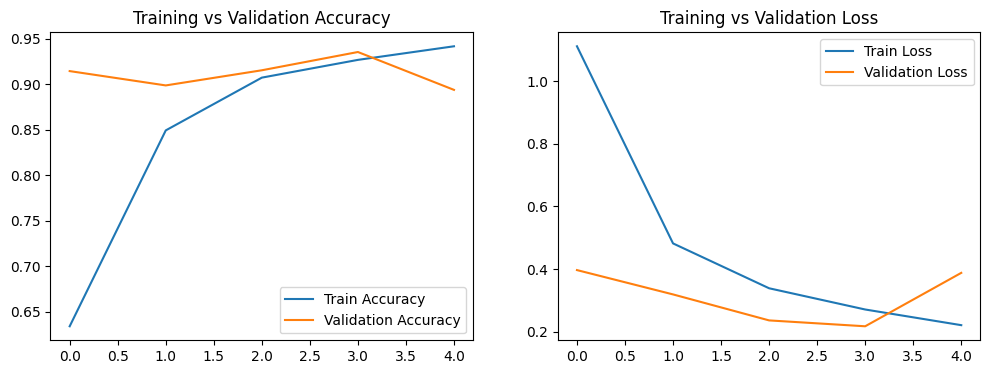

246/246 [==============================] - 2s 6ms/step


In [54]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_fnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_fnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_fnn.history['loss'], label='Train Loss')
plt.plot(history_fnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Extract the true class labels from the generator
y_true = []
for _, label in test_gen:
    y_true.extend(label)
y_true = np.array(y_true)

# Use the model to make predictions
predictions = model_fnn.predict(test_gen)
# Convert predictions from probabilities to class labels
y_pred = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)


# Confusion matrix for Feed-Forward Neural Network (Dense/MLP)

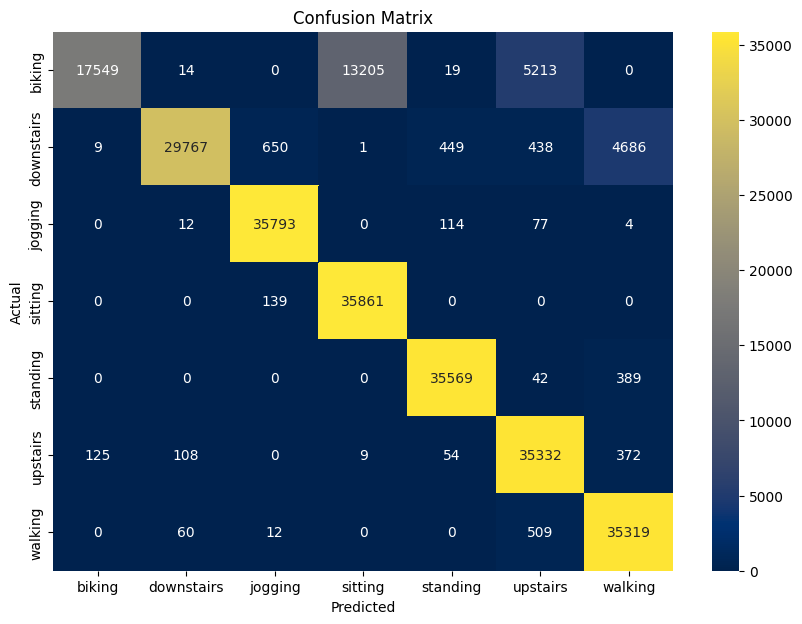

In [55]:
# Visualize the confusion matrix using the predefined labels
labels = ['biking', 'downstairs', 'jogging', 'sitting', 'standing', 'upstairs', 'walking']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='cividis', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3. Create and compile LSTM model

In [56]:
# Necessary imports
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, LSTM, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler


In [57]:
# Set the random seeds for reproducibility
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [58]:
# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(n_time_steps, n_features),
              kernel_regularizer=l2(0.000001), bias_regularizer=l2(0.000001), name='lstm_1'))
model.add(Dropout(0.3, name='dropout_1'))  # Dropout layer after LSTM
model.add(Flatten(name='flatten'))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.000001), bias_regularizer=l2(0.000001), name='dense_1'))
model.add(Dropout(0.3, name='dropout_2'))  # Dropout layer after Dense
model.add(Dense(len(np.unique(y_train)), activation='softmax', 
                kernel_regularizer=l2(0.000001), bias_regularizer=l2(0.000001), name='output'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 32)           5376      
                                                                 
 dropout_1 (Dropout)         (None, 100, 32)           0         
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                204864    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 output (Dense)              (None, 7)                 455       
                                                                 
Total params: 210695 (823.03 KB)
Trainable params: 210

In [59]:
# Learning Rate Scheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * (drop ** (epoch // epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)
optimizer = Adam(learning_rate=0.001)

In [60]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [61]:
# Prepare callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

callbacks = [ModelCheckpoint('model.h5', save_weights_only=False, save_best_only=True, verbose=1),
            early_stop,
            lrate]

## Start training

In [62]:
# Train the model
history = model.fit(train_gen, epochs=5, validation_data=test_gen, callbacks=callbacks)
model.save('my_model.keras')


Epoch 1/5
985/985 [==============================] - ETA: 0s - loss: 0.5203 - accuracy: 0.8221
Epoch 1: val_loss improved from inf to 0.33605, saving model to model.h5
985/985 [==============================] - 174s 176ms/step - loss: 0.5203 - accuracy: 0.8221 - val_loss: 0.3361 - val_accuracy: 0.9186 - lr: 0.0010
Epoch 2/5


C:\Users\haari\anaconda3\envs\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


985/985 [==============================] - ETA: 0s - loss: 0.1094 - accuracy: 0.9738
Epoch 2: val_loss did not improve from 0.33605
985/985 [==============================] - 183s 185ms/step - loss: 0.1094 - accuracy: 0.9738 - val_loss: 0.4005 - val_accuracy: 0.9236 - lr: 0.0010
Epoch 3/5
985/985 [==============================] - ETA: 0s - loss: 0.1035 - accuracy: 0.9760
Epoch 3: val_loss improved from 0.33605 to 0.11673, saving model to model.h5
985/985 [==============================] - 181s 184ms/step - loss: 0.1035 - accuracy: 0.9760 - val_loss: 0.1167 - val_accuracy: 0.9560 - lr: 0.0010
Epoch 4/5
985/985 [==============================] - ETA: 0s - loss: 0.0607 - accuracy: 0.9853
Epoch 4: val_loss improved from 0.11673 to 0.04703, saving model to model.h5
985/985 [==============================] - 177s 180ms/step - loss: 0.0607 - accuracy: 0.9853 - val_loss: 0.0470 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 5/5
985/985 [==============================] - ETA: 0s - loss: 0.0464 - ac

In [63]:
# Load the best saved model
model = load_model('model.h5')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 32)           5376      
                                                                 
 dropout_1 (Dropout)         (None, 100, 32)           0         
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                204864    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 output (Dense)              (None, 7)                 455       
                                                                 
Total params: 210695 (823.03 KB)
Trainable params: 210

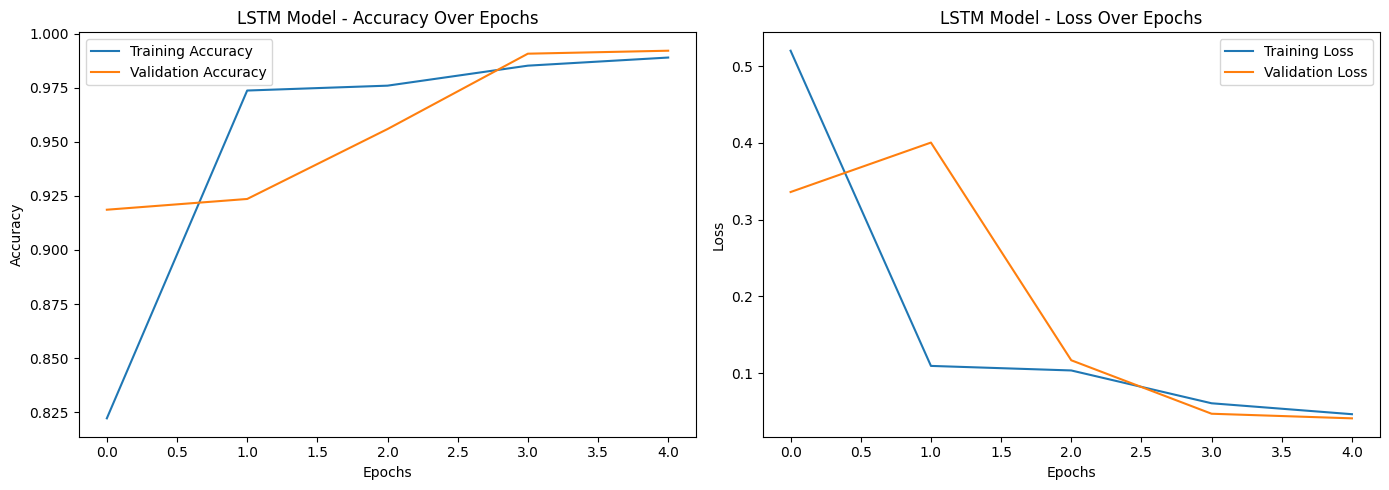

In [64]:
# 1. Plotting the Accuracy and Loss

plt.figure(figsize=(14, 5))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model - Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model - Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix for LSTM

246/246 [==============================] - 14s 56ms/step


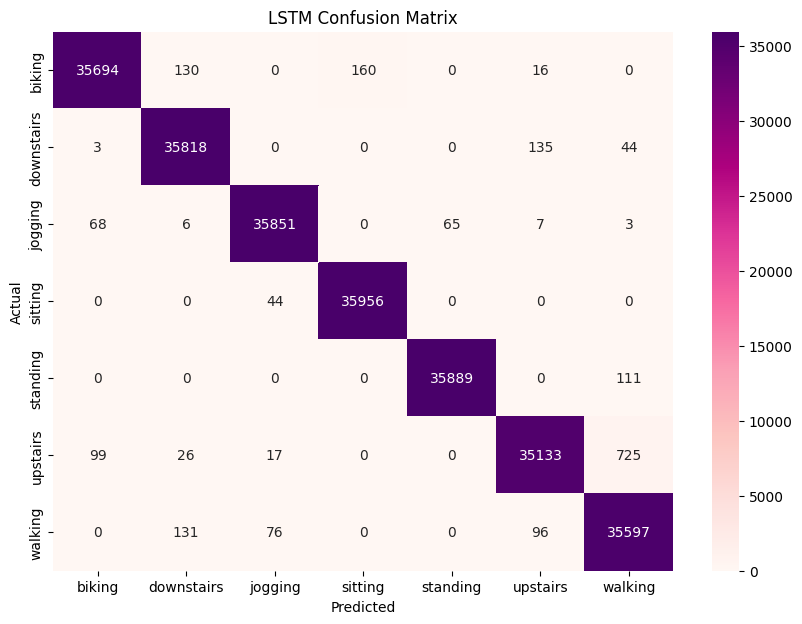

In [71]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use the model to make predictions
predictions = model.predict(test_gen)
y_pred = np.argmax(predictions, axis=1)

# Extract the true class labels from the generator
y_true = []
for _, label in test_gen:
    y_true.extend(label)
y_true = np.array(y_true)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
labels = ['biking', 'downstairs', 'jogging', 'sitting', 'standing', 'upstairs', 'walking']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='RdPu', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Confusion Matrix')
plt.show()


# Comparison between all the three models

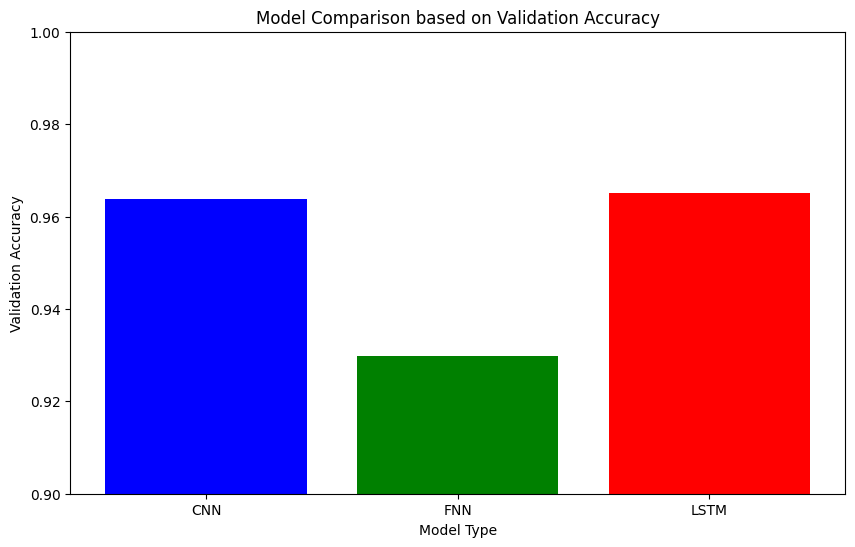

In [77]:
import matplotlib.pyplot as plt

# Insert the highest validation accuracies from your results.
max_val_accuracy_cnn = 0.9637
max_val_accuracy_fnn = 0.9298
max_val_accuracy_lstm = 0.9651

accuracies = {
    "CNN": max_val_accuracy_cnn,
    "FNN": max_val_accuracy_fnn,
    "LSTM": max_val_accuracy_lstm
}

# Extract the model names and their accuracies
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_values, color=['blue', 'green', 'red'])
plt.xlabel('Model Type')
plt.ylabel('Validation Accuracy')
plt.title('Model Comparison based on Validation Accuracy')
plt.ylim([0.9, 1])  # Adjust as per your accuracy range
plt.show()


Based on the validation accuracy, the LSTM model significantly outperforms the other models on the HAR dataset, followed by the FNN and then the CNN.

# Exporting the model

In [67]:
model.save('my_model.h5')
# Load the best saved model
model = load_model('my_model.h5')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 32)           5376      
                                                                 
 dropout_1 (Dropout)         (None, 100, 32)           0         
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                204864    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 output (Dense)              (None, 7)                 455       
                                                                 
Total params: 210695 (823.03 KB)
Trainable params: 210

In [68]:
# Exporting the model
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

frozen_out_path = ''
frozen_graph_filename = "frozen_graph"

full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 60)
print("Frozen model layers: ")
for layer in layers:
    print(layer)
print("-" * 60)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)

tf.io.write_graph(graph_or_graph_def=frozen_func.graph, logdir=frozen_out_path, name=f"{frozen_graph_filename}.pb", as_text=False)
tf.io.write_graph(graph_or_graph_def=frozen_func.graph, logdir=frozen_out_path, name=f"{frozen_graph_filename}.pbtxt", as_text=True)

------------------------------------------------------------
Frozen model layers: 
x
sequential_2/lstm_1/zeros_1/packed/1
sequential_2/lstm_1/zeros_1/Const
sequential_2/lstm_1/strided_slice/stack
sequential_2/lstm_1/strided_slice/stack_1
sequential_2/lstm_1/strided_slice/stack_2
sequential_2/lstm_1/PartitionedCall/strided_slice/stack
sequential_2/lstm_1/PartitionedCall/strided_slice/stack_1
sequential_2/lstm_1/PartitionedCall/strided_slice/stack_2
sequential_2/lstm_1/Read_2/ReadVariableOp/resource
sequential_2/lstm_1/PartitionedCall/while/loop_counter
sequential_2/lstm_1/Read_1/ReadVariableOp/resource
sequential_2/lstm_1/PartitionedCall/transpose/perm
sequential_2/lstm_1/PartitionedCall/TensorArrayUnstack/TensorListFromTensor/element_shape
sequential_2/lstm_1/zeros/packed/1
sequential_2/lstm_1/zeros/Const
sequential_2/lstm_1/Read/ReadVariableOp/resource
sequential_2/lstm_1/PartitionedCall/time
sequential_2/lstm_1/PartitionedCall/TensorArrayV2_1/element_shape
sequential_2/lstm_1/Partiti

'frozen_graph.pbtxt'